# [Revisitado] Projeto #1 - Análise Exploratória de Dados

### Base de dados

<p style='text-align: justify;'><font size=3.5>A base de dados escolhida foi <b>Acidentes rodovias federais Brasil Jan/07 a Set/21</b> do Portal da Polícia Rodoviária Federal que possui registros das ocorrências de acidentes entre os anos de 2007 a 2021.</font></p>

<p style='text-align: justify;'><font size=3.5>Essa base foi selecionada com o objetivo de aplicar técnicas de mineração de padrões visando a descoberta de informações que possam auxiliar na prevenção de acidentes. A técnica de associação será usada para identificar a ocorrência de relações entre a classificação do acidente e as variáveis de risco na tentativa de descobrir relações entre esses fatores.</font></p>

> Fonte: MINISTÉRIO DA JUSTIÇA E SEGURANÇA PÚBLICA (Brasil). Polícia Rodoviária
Federal. **Dados Abertos: Acidentes**. [S. l.], 13 maio 2021. Disponível em:
https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dados-abertos-acidentes. Acesso em: 13 nov. 2021.

### Dicionário dos dados

| Atributo | Significado |
| --- | --- |
| id | identificador da ocorrência |
| pesid | identificador da pessoa envolvida |
| data_inversa | data da ocorrência |
| dia_semana | dia da semana da ocorrência |
| horario | horário da ocorrência |
| uf | unidade da federação |
| br  | identificador da BR do acidente |
| km | identificação do quilômetro onde ocorreu o acidente |
| municipio | nome do muncípio de ocorrência do acidente |
| causa_acidente | causa principal do acidente |
| tipo_acidente | identificação do tipo de acidente |
| classificacao_acidente | classificação quanto à gravidade do acidente |
| fase_dia | fase do dia no momento do acidente |
| sentido_via | sentido da via considerando o ponto de colisão |
| condicao_metereologica | condição meteorologica no momento do acidente |
| tipo_pista | tipo da pista considerando a quantidade de faixa |
| tracado_via | descrição do traçado da via |
| uso_solo | descrição sobre as características do local do acidente |
| id_veiculo | identificador do veículo envolvido |
| marca | descrição marca do veículo |
| ano_fabricacao_veiculo | ano de fabricação do veículo |
| tipo_envolvido | tipo de envolvido no acidente conforme sua participação no evento |
| estado_fisico | condição do envolvido conforme a gravidade das lesões |
| idade | idade do envolvido. O código '-1' indica que não foi possível coletar tal informação |
| sexo | sexo do envolvido. O valor 'inválido' indica que não foi possível coletar tal informação |

### Bibliotecas básicas e outros imports

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%run modules/text.py

%matplotlib inline
plt.rcParams['font.family'] = 'Arial, Helvetica, sans-serif'

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
np.set_printoptions(suppress=True, precision=3)

### Carregamento dos dados

In [2]:
df = pd.read_csv('dataset/acidentes_rodovias_brasileiras_2007_a_2021.csv', low_memory=False, encoding='utf-8')
print(f'Linhas: {df.shape[0]} | Coluna:  {df.shape[1]}')
df.head(2)

Linhas: 1906350 | Coluna:  26


,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,sentido_via,condicao_metereologica,tipo_pista,tracado_via,uso_solo,id_veiculo,tipo_veiculo,marca,ano_fabricacao_veiculo,tipo_envolvido,estado_fisico,idade,sexo
0,8.0,5018708.0,22/11/2014,Sábado,09:35:00,PR,376,335.6,ORTIGUEIRA,Defeito mecânico em veículo,Saída de Pista,(null),Pleno dia,Crescente,Chuva,Simples,Curva,Rural,18763467,Automóvel,FORD/ESCORT L ...,1987,Condutor,Ileso,34.0,Masculino
1,9.0,5019034.0,17/11/2014,Segunda,20:50:00,BA,324,530.0,FEIRA DE SANTANA,Ultrapassagem indevida,Colisão frontal,(null),Plena noite,Crescente,Chuva,Dupla,Curva,Urbano,18763578,Caminhonete,NISSAN/FRONTIER,2014,Condutor,Ileso,32.0,Masculino


### Seleção de features

In [3]:
df.drop(['horario', 
         'pesid', 
         'id_veiculo', 
         'marca', 
         'km', 
         'idade', 
         'sexo', 
         'ano_fabricacao_veiculo'], axis=1, inplace=True)

### Remoção registros nulos

In [4]:
for col in df.columns:
    df.drop(df[df[col] == '(null)'].index, inplace=True)    
df.dropna(inplace=True)

### Verificação dados nulos

In [5]:
print('Porcentagem de dados ausentes: ', df.isnull().sum().sum())

Porcentagem de dados ausentes:  0


### Limpeza dos dados

In [6]:
cols = ['causa_acidente', 
        'tipo_acidente', 
        'classificacao_acidente', 
        'fase_dia', 
        'sentido_via', 
        'condicao_metereologica', 
        'tipo_pista', 
        'tracado_via',
        'estado_fisico', 
        'tipo_envolvido',
        'tipo_veiculo']

for c in cols:
    df[c] = df[c].apply(cleaning)

### Padronização do texto

In [7]:
df['municipio'] = df['municipio'].apply(lambda x : x.capitalize())
df['dia_semana'] = df['dia_semana'].apply(padronizaDiaSemana)
df['causa_acidente'] = df['causa_acidente'].apply(padronizaCausaAcidente)
df['tipo_acidente'] = df['tipo_acidente'].apply(padronizaTipoAcidente)
df['br'] = df['br'].apply(padronizaNomeBrs)
df['uso_solo'] = df['uso_solo'].apply(padronizaUsoSolo)
df['estado_fisico'] = df['estado_fisico'].apply(padronizaEstadoFisico)
df['tipo_veiculo'] = df['tipo_veiculo'].apply(padronizaTipoVeiculo)

### Tratamento coluna data

In [8]:
df['data'] = pd.to_datetime(df['data_inversa'])
df['mes'] = df['data'].dt.month
df['ano'] = df['data'].dt.year
df.drop(['data_inversa'], axis=1, inplace=True)

### Correção tipagem dados

In [9]:
df['id'] = df['id'].astype('float')

### Informação dos dados

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894736 entries, 10 to 1906349
Data columns (total 20 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   id                      float64       
 1   dia_semana              object        
 2   uf                      object        
 3   br                      object        
 4   municipio               object        
 5   causa_acidente          object        
 6   tipo_acidente           object        
 7   classificacao_acidente  object        
 8   fase_dia                object        
 9   sentido_via             object        
 10  condicao_metereologica  object        
 11  tipo_pista              object        
 12  tracado_via             object        
 13  uso_solo                object        
 14  tipo_veiculo            object        
 15  tipo_envolvido          object        
 16  estado_fisico           object        
 17  data                    datetime64[ns]
 18  m

### Análise exploratória dos dados

Classificação de acidentes

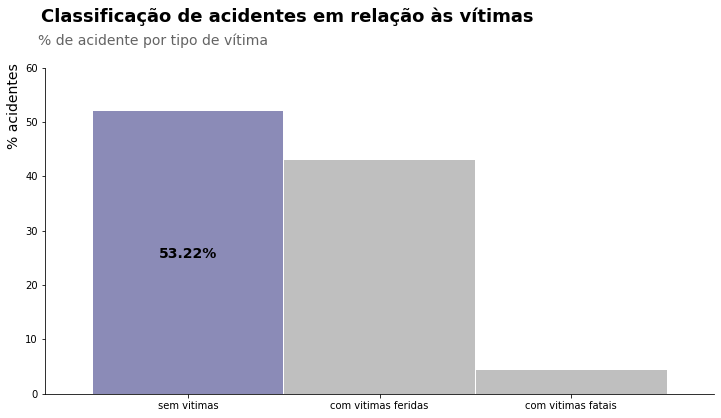

In [11]:
suptitle = 'Classificação de acidentes em relação às vítimas'
title = '% de acidente por tipo de vítima'
colors=['#191970', '#808080', '#808080', '#808080']

percentual = round(df['classificacao_acidente'].value_counts(normalize=True) * 100, 2)
percentual[:3].plot.bar(width=0.993, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.75)
plt.grid(False)
plt.text(0, 25, '53.22%', fontsize=14, weight='bold', horizontalalignment='center')
plt.ylim(0, 60)
plt.show()

> <p style='text-align: justify;'><font size=2.85>53.22% dos acidentes ocorridos entre 2007 e 2021 foram sem vítimas.</font></p>

Ano

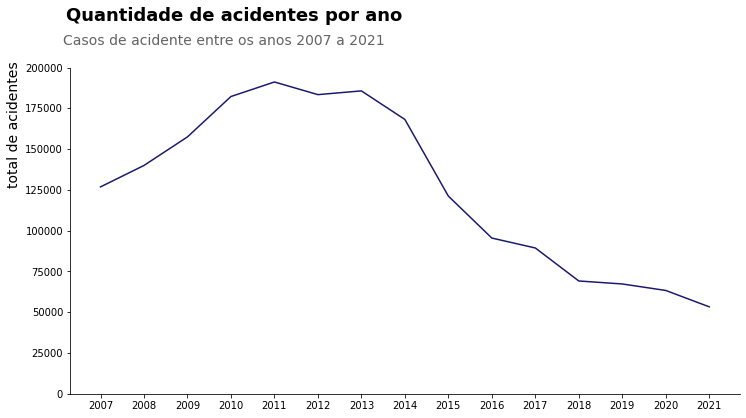

In [12]:
suptitle = 'Quantidade de acidentes por ano'
title = 'Casos de acidente entre os anos 2007 a 2021'

ticks = [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

percentual = df.groupby(['ano'])['id'].count()
percentual.plot.line(figsize=(12, 6), rot=False, color='#191970').spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('total de acidentes', fontsize=14, horizontalalignment='left', y=0.63)
plt.xlabel(None)
plt.xticks(ticks)
plt.ylim(0, 200000)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Houve um aumento gradativo das ocorrências de acidentes entre 2007 e 2011. Tivemos uma pequena queda em 2012 e após um aumento em 2013, as ocorrências voltaram a cair e mativeram esse padrão de queda com pequenos picos no decorrer dos anos. O motivo dessa queda nos acidentes, pode ser porque em maio de 2011 a ONU promulgou a 'Década de Ação pela Segurança no Trânsito' com a meta de reduzir em até 50% os sinistros em todo o mundo.</font></p>

### Estado físico

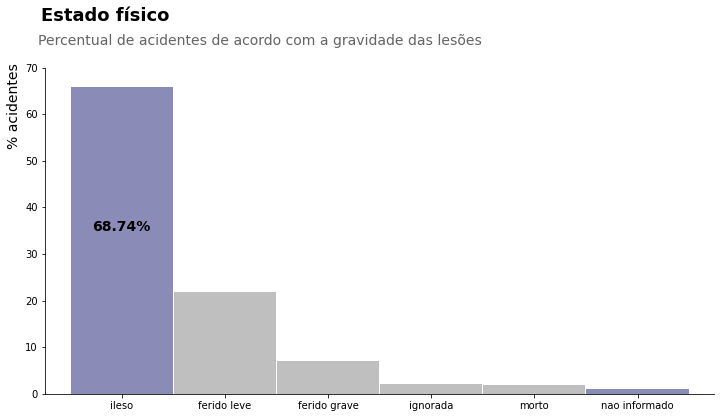

In [13]:
suptitle = 'Estado físico'
title = 'Percentual de acidentes de acordo com a gravidade das lesões'

colors=['#191970', '#808080', '#808080', '#808080', '#808080']

percentual = round(df['estado_fisico'].value_counts(normalize=True) * 100, 2)
percentual.plot.bar(width=0.99, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.75)
plt.grid(False)
plt.text(0, 35, '68.74%', fontsize=14, weight='bold', horizontalalignment='center')
plt.xlabel(None)
plt.ylim(0, 70)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Na maioria dos acidentes, os envolvidos sairam sem ferimentos. Menos de 2% dessas ocorrências tiveram vítimas fatais.</font></p>

### Tipo de envolvido

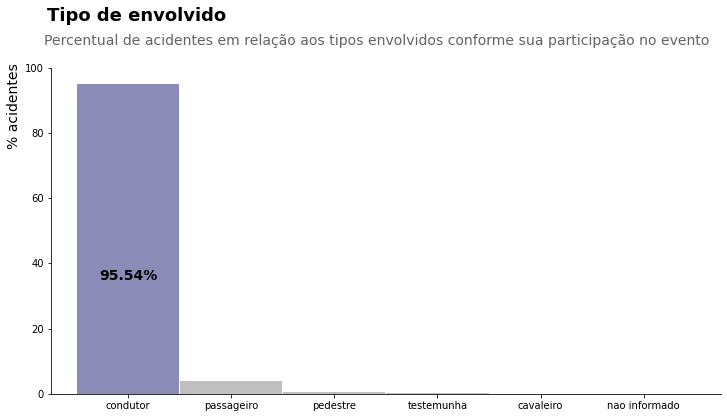

In [14]:
suptitle = 'Tipo de envolvido'
title = 'Percentual de acidentes em relação aos tipos envolvidos conforme sua participação no evento'

colors=['#191970', '#808080', '#808080', '#808080']

percentual = round(df['tipo_envolvido'].value_counts(normalize=True) * 100, 2)
percentual.plot.bar(width=0.99, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.75)
plt.grid(False)
plt.text(0, 35, '95.54%', fontsize=14, weight='bold', horizontalalignment='center')
plt.xlabel(None)
plt.ylim(0, 100)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Em quase 100% dos acidentes, o condutor teve participação no evento.</font></p>

Meses

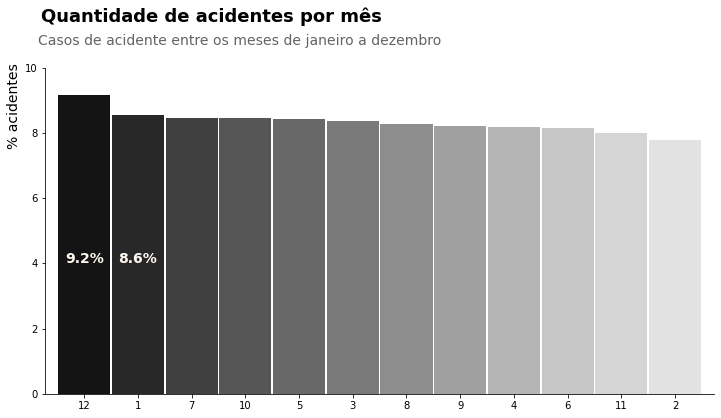

In [15]:
suptitle = 'Quantidade de acidentes por mês'
title = 'Casos de acidente entre os meses de janeiro a dezembro'

percentual = round(df['mes'].value_counts(normalize=True) * 100, 2)
percentual.plot.bar(width=0.97, figsize=(12, 6), rot=False, color=sns.color_palette('Greys_r', n_colors=14)).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.75)
plt.grid(False)
plt.text(0, 4, '9.2%', fontsize=14, color='#FFFAF0', weight='bold', horizontalalignment='center')
plt.text(1, 4, '8.6%', fontsize=14, color='#FFFAF0', weight='bold', horizontalalignment='center')
plt.xlabel(None)
plt.ylim(0, 10)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Os meses de dezembro e janeiro concentram a maior parte dos casos. Um possível motivo é o fato de serem o período de férias escolares.</font></p>

Estados

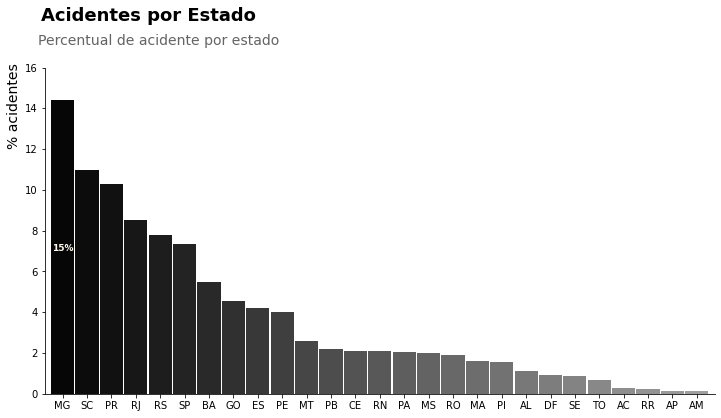

In [16]:
suptitle = 'Acidentes por Estado'
title = 'Percentual de acidente por estado'

percentual = round(df['uf'].value_counts(normalize=True) * 100, 2)
percentual.plot.bar(width=0.95, figsize=(12, 6), rot=False, color=sns.color_palette('Greys_r', n_colors=50)).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.75)
plt.text(0, 7, '15%', fontsize=9, weight='bold', color='#FFFAF0', horizontalalignment='center')
plt.ylim(0, 16)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Minas Gerais é o estado com o maior índice de acidentes, provavelmente por possuir a maior malha rodoviária do país. Segundo dados do Estado, essa malha é equivalente a cerca de 16% do somatório de rodovias estaduais, federais e municipais de toda a malha viária existente no país. Apenas em MG, são 272.062,90 km de rodovias, sendo 9.205 km de rodovias federais.</font></p>

Vítimas por Estado

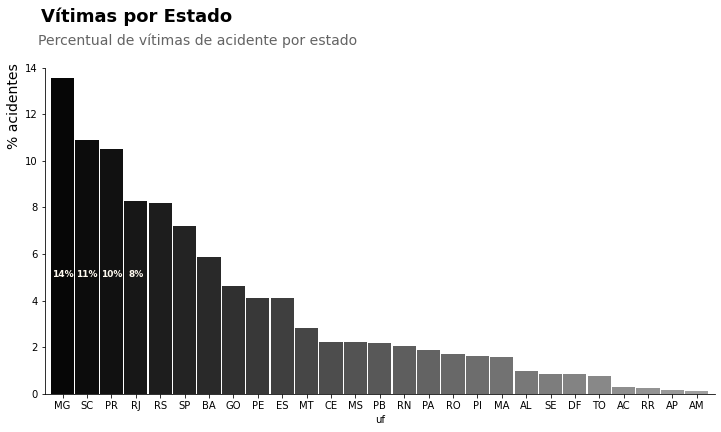

In [17]:
suptitle = 'Vítimas por Estado'
title = 'Percentual de vítimas de acidente por estado'

vitimas = df.groupby(by=['uf'])['id'].sum().sort_values(ascending=False)
percentual = round(vitimas/vitimas.sum()*100, 2)
percentual.plot.bar(width=0.95, figsize=(12, 6), rot=False, color=sns.color_palette('Greys_r', n_colors=50)).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.75)
plt.text(0, 5, '14%', fontsize=9, weight='bold', color='#FFFAF0', horizontalalignment='center')
plt.text(1, 5, '11%', fontsize=9, weight='bold', color='#FFFAF0', horizontalalignment='center')
plt.text(2, 5, '10%', fontsize=9, weight='bold', color='#FFFAF0', horizontalalignment='center')
plt.text(3, 5, '8%', fontsize=9, weight='bold', color='#FFFAF0', horizontalalignment='center')
plt.ylim(0, 14)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Minas Gerais, Santa Catarina, Paraná e Rio de Janeiro concentram 43% de acidentes com vítimas nas rodovias federais.</font></p>

Vítimas fatais

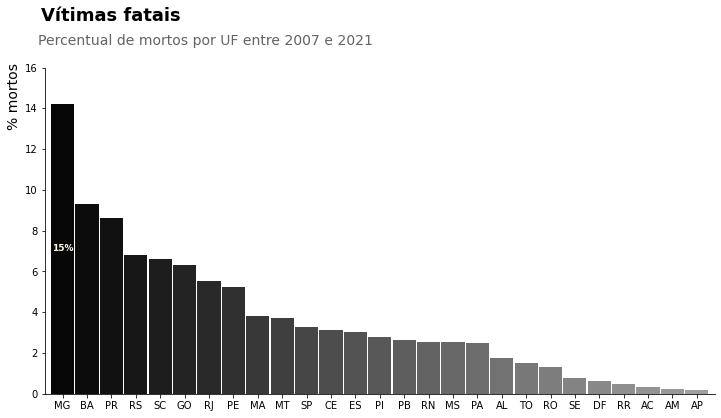

In [18]:
suptitle = 'Vítimas fatais'
title = 'Percentual de mortos por UF entre 2007 e 2021'

sample = df.query('estado_fisico=="morto"')
mortos = sample.groupby(['uf'])['id'].sum().sort_values(ascending=False)
percentual = mortos/mortos.sum()*100
percentual.plot.bar(width=0.95, figsize=(12, 6), rot=False, color=sns.color_palette('Greys_r', n_colors=50)).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% mortos', fontsize=14, horizontalalignment='left', y=0.81)
plt.text(0, 7, '15%', fontsize=9, weight='bold', color='#FFFAF0', horizontalalignment='center')
plt.grid(False)
plt.xlabel(None)
plt.ylim(0, 16)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Minas Gerais possui a maior quantidade de mortes em acidentes nas rodovias com 15%.</font></p>

Minas Gerais

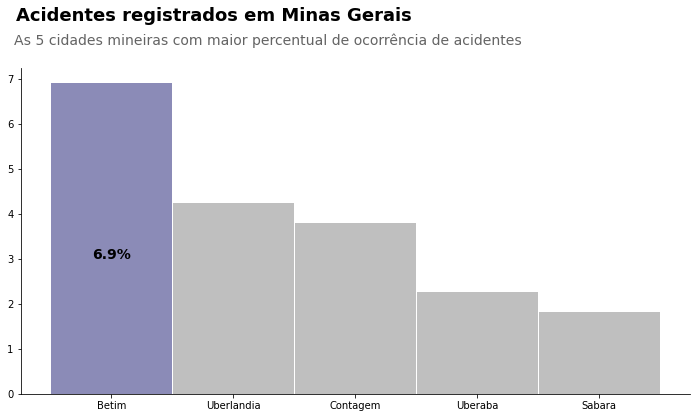

In [19]:
suptitle = 'Acidentes registrados em Minas Gerais'
title = 'As 5 cidades mineiras com maior percentual de ocorrência de acidentes'

colors=['#191970', '#808080', '#808080', '#808080', '#808080']

municipios = municipios = df.query('uf== "MG"')
percentual = round(municipios['municipio'].value_counts(normalize=True) * 100, 2).sort_values(ascending=False).head(5)
percentual.plot.bar(width=0.99, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.text(0, 3, '6.9%', fontsize=14, weight='bold', horizontalalignment='center')
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Betim lidera sendo a cidade mineira com maior percentual de acidentes.</font></p>

Rodovias federais

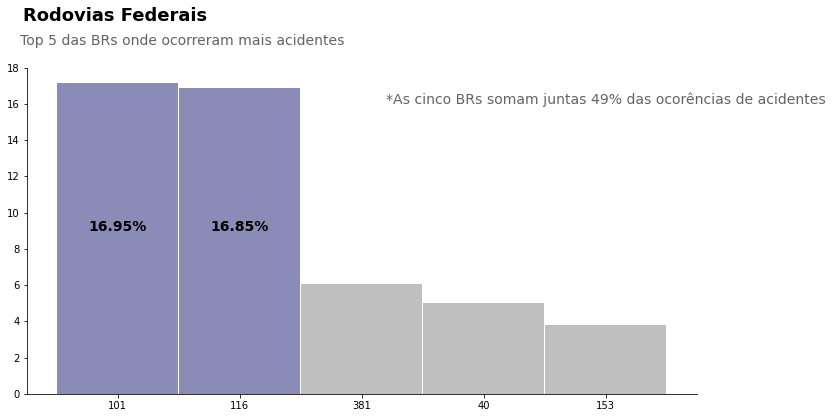

In [20]:
suptitle = 'Rodovias Federais'
title = 'Top 5 das BRs onde ocorreram mais acidentes'

aviso = '*As cinco BRs somam juntas 49% das ocorências de acidentes'
colors=['#191970', '#191970', '#808080', '#808080', '#808080']

percentual = round(df['br'].value_counts(normalize=True) * 100, 2).sort_values(ascending=False).head(5)
percentual.plot.bar(width=0.99, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.text(4, 16, aviso, fontsize=14, color='#646464', horizontalalignment='center')
plt.text(0, 9, '16.95%', fontsize=14, weight='bold', horizontalalignment='center')
plt.text(1, 9, '16.85%', fontsize=14, weight='bold', horizontalalignment='center')
plt.ylim(0, 18)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>As BR101, BR116, BR381, BR40 e BR153 são as rodovias federais com maior número de acidentes. Sendo as BRs 101 e 116 os trechos com as maiores taxas. A BR116 é ao lado da BR101 um dos principais eixos rodoviários do país. Juntas, elas somam 9136 km de extensão.</font></p>

Causas de acidentes

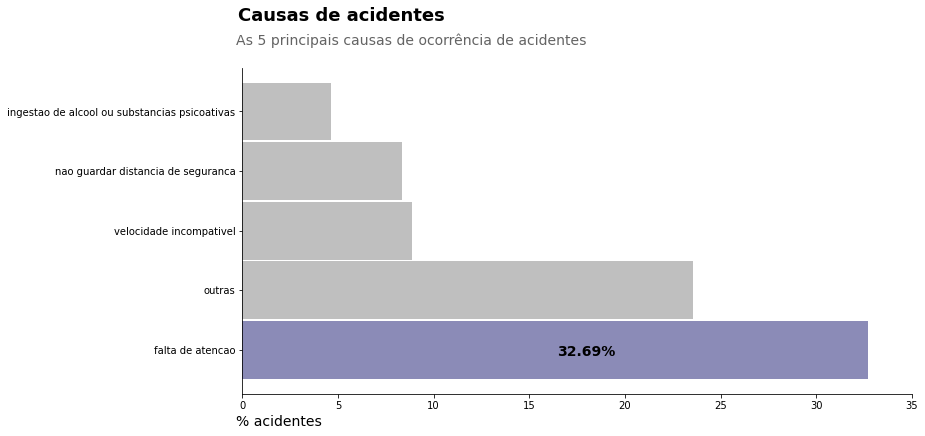

In [21]:
suptitle = 'Causas de acidentes'
title = 'As 5 principais causas de ocorrência de acidentes'

colors=['#191970', '#808080', '#808080', '#808080', '#808080']

percentual = round(df['causa_acidente'].value_counts(normalize=True)*100, 2).head(5)
percentual.plot.barh(width=0.97, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.xlabel('% acidentes', fontsize=14, horizontalalignment='left', x=-0.01)
plt.text(18, -0.1, '32.69%', fontsize=14, weight='bold', horizontalalignment='center')
plt.xlim(0, 35)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>A principal causa de acidentes é a falta de atenção, com 33% de ocorrências nesse período.</font></p>

Tipo de acidente

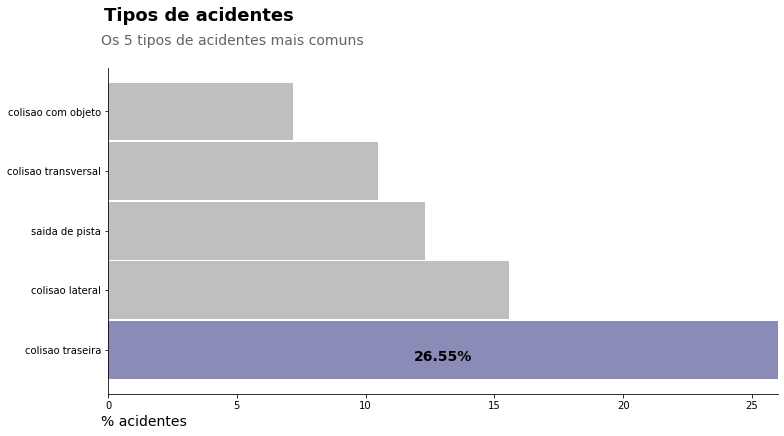

In [22]:
suptitle = 'Tipos de acidentes'
title = 'Os 5 tipos de acidentes mais comuns'

colors=['#191970', '#808080', '#808080', '#808080', '#808080']

percentual = round(df['tipo_acidente'].value_counts(normalize=True) * 100, 2).sort_values(ascending=False).head(5)
percentual.plot.barh(width=0.97, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.xlabel('% acidentes', fontsize=14, horizontalalignment='left', x=-0.01)
plt.text(13, -0.18, '26.55%', fontsize=14, weight='bold', horizontalalignment='center')
plt.xlim(0, 26)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>O tipo mais comum de acidente é colisão traseira.</font></p>

### Tipo de veículo

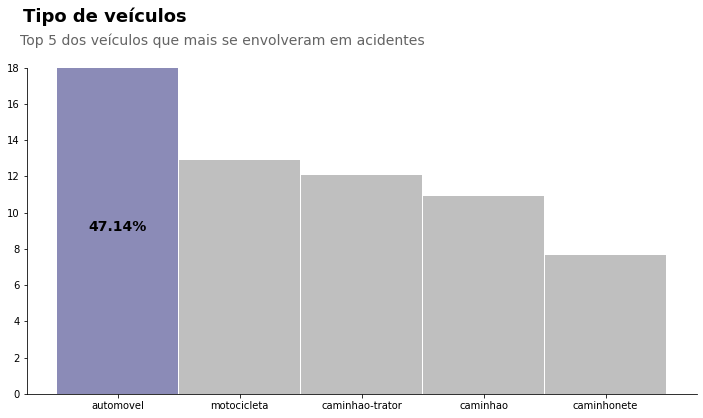

In [23]:
suptitle = 'Tipo de veículos'
title = 'Top 5 dos veículos que mais se envolveram em acidentes'

colors=['#191970', '#808080', '#808080', '#808080', '#808080']

percentual = round(df['tipo_veiculo'].value_counts(normalize=True) * 100, 2).sort_values(ascending=False).head(5)
percentual.plot.bar(width=0.99, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.text(0, 9, '47.14%', fontsize=14, weight='bold', horizontalalignment='center')
plt.ylim(0, 18)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>47% dos acidentes envolveram veículos do tipo automóvel.</font></p>

Fase do dia

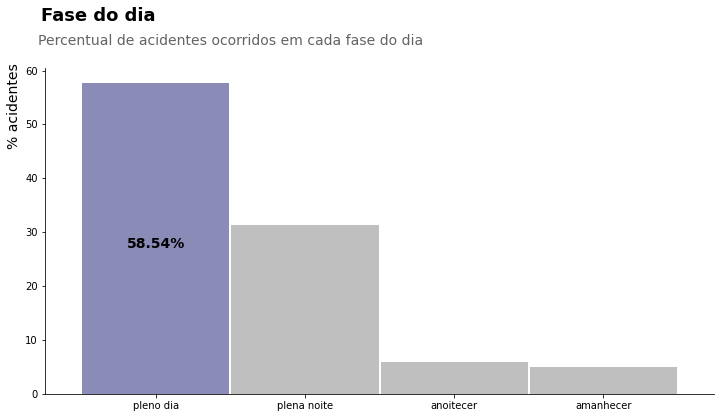

In [24]:
suptitle = 'Fase do dia'
title = 'Percentual de acidentes ocorridos em cada fase do dia'

colors=['#191970', '#808080', '#808080', '#808080']

percentual = round(df['fase_dia'].value_counts(normalize=True) * 100, 2)
percentual.plot.bar(width=0.987, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.75)
plt.text(0, 27, '58.54%', fontsize=14, weight='bold', horizontalalignment='center')
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Em média, 58% dos acidentes ocorreram durante o dia.</font></p>

Traçado da via

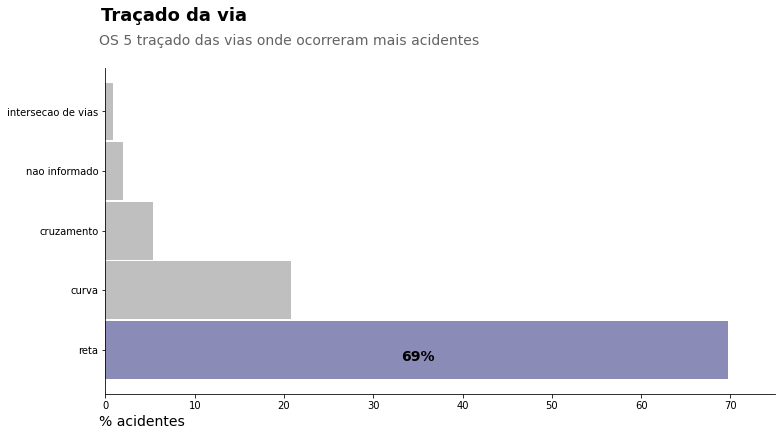

In [25]:
suptitle = 'Traçado da via'
title = 'OS 5 traçado das vias onde ocorreram mais acidentes'

colors=['#191970', '#808080', '#808080', '#808080', '#808080']

percentual = round(df['tracado_via'].value_counts(normalize=True) * 100, 2).sort_values(ascending=False).head(5)
percentual.plot.barh(width=0.97, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.xlabel('% acidentes', fontsize=14, horizontalalignment='left', x=-0.01)
plt.text(35, -0.18, '69%', fontsize=14, weight='bold', horizontalalignment='center')
plt.xlim(0, 75)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Cerca de 69% das ocorrências foram em pistas retas.</font></p>

Tipo de pista

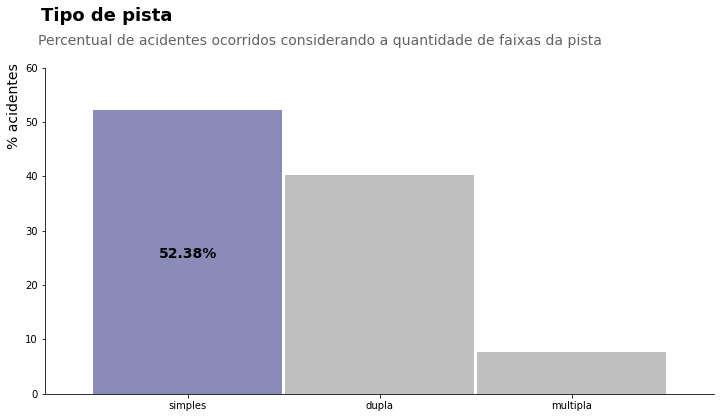

In [26]:
suptitle = 'Tipo de pista'
title = 'Percentual de acidentes ocorridos considerando a quantidade de faixas da pista'

colors=['#191970', '#808080', '#808080']

percentual = round(df['tipo_pista'].value_counts(normalize=True) * 100, 2)
percentual.plot.bar(width=0.987, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.75)
plt.text(0, 25, '52.38%', fontsize=14, weight='bold', horizontalalignment='center')
plt.grid(False)
plt.ylim(0, 60)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Mais da metade dos acidentes ocorreu em pistas simples.</font></p>

Condição meteorológica

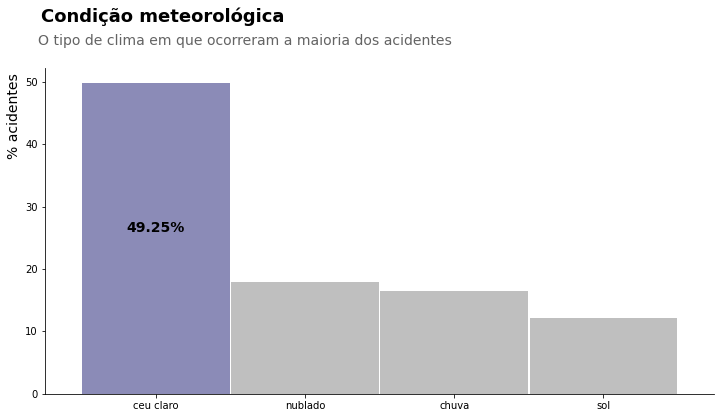

In [27]:
suptitle = 'Condição meteorológica'
title = 'O tipo de clima em que ocorreram a maioria dos acidentes'

colors=['#191970', '#808080', '#808080', '#808080', '#808080']

percentual = round((df.groupby(['condicao_metereologica'])['id'].count() * 100) / len(df), 2).sort_values(ascending=False).head(4)
percentual.plot.bar(width=0.99, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.72)
plt.text(0, 26, '49.25%', fontsize=14, weight='bold', horizontalalignment='center')
plt.xlabel(None)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Mais de 49% dos acidentes ocorreram em dias de céu claro.</font></p>

Uso do solo

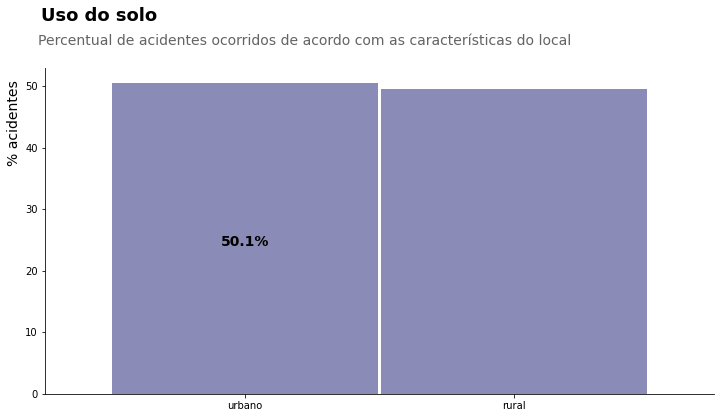

In [28]:
suptitle = 'Uso do solo'
title = 'Percentual de acidentes ocorridos de acordo com as características do local'

percentual = round(df['uso_solo'].value_counts(normalize=True) * 100, 2)
percentual.plot.bar(width=0.99, alpha=0.5, figsize=(12, 6), rot=False, color='#191970').spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.70)
plt.text(0, 24, '50.1%', fontsize=14, weight='bold', horizontalalignment='center')
plt.xlabel(None)
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Parece não existir uma grande variação na ocorrência de acidentes considerando se é cidade ou zona rural.</font></p>

### Dependência entre variáveis

Estação do ano

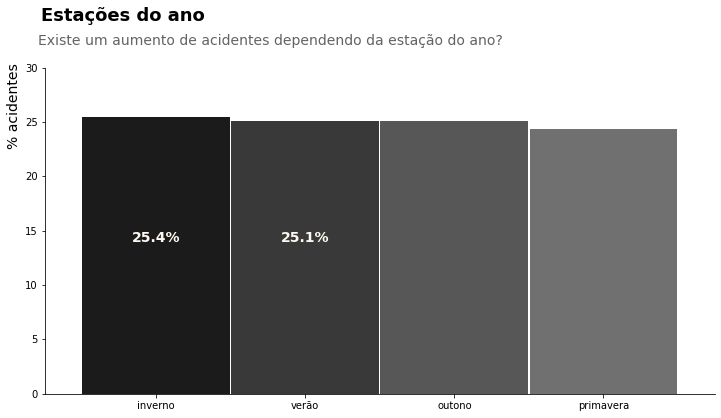

In [29]:
suptitle = 'Estações do ano'
title = 'Existe um aumento de acidentes dependendo da estação do ano?'

df['estacao_do_ano'] = df['data'].apply(mapEstacaoAno)

percentual = round(df['estacao_do_ano'].value_counts(normalize=True)*100, 2)
percentual.plot.bar(width=0.99, figsize=(12, 6), rot=False, color=sns.color_palette('Greys_r', n_colors=10)).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.75)
plt.text(0, 14, '25.4%', color='#FFFAF0', fontsize=14, weight='bold', horizontalalignment='center')
plt.text(1, 14, '25.1%', color='#FFFAF0', fontsize=14, weight='bold', horizontalalignment='center')
plt.grid(False)
plt.ylim(0, 30)
plt.show()

> <p style='text-align: justify;'><font size=2.85>De uma maneira geral, a quantidade de acidentes não aumenta ou diminui dependendo da estação do ano. Por exemplo, a diferença entre o % de acidentes entre o verão e inverno é baixa, sendo de 0.2%.</font></p>

Dias da semana

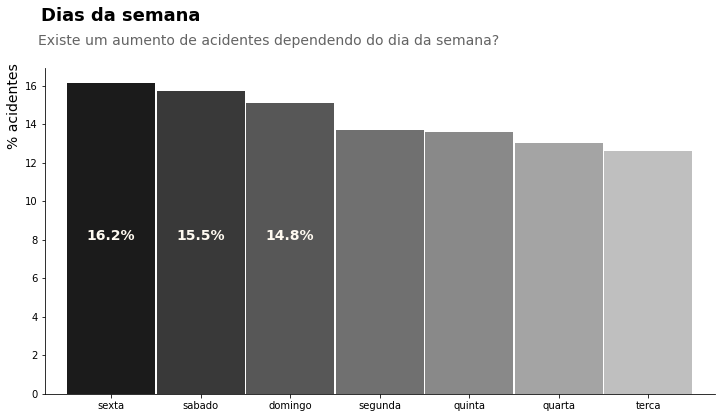

In [30]:
suptitle = 'Dias da semana'
title = 'Existe um aumento de acidentes dependendo do dia da semana?'

percentual = round(df['dia_semana'].value_counts(normalize=True)*100, 2)
percentual.plot.bar(width=0.98, figsize=(12, 6), rot=False, color=sns.color_palette('Greys_r', n_colors=10)).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.75)
plt.text(0, 8, '16.2%', color='#FFFAF0', fontsize=14, weight='bold', horizontalalignment='center')
plt.text(1, 8, '15.5%', color='#FFFAF0', fontsize=14, weight='bold', horizontalalignment='center')
plt.text(2, 8, '14.8%', color='#FFFAF0', fontsize=14, weight='bold', horizontalalignment='center')
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>Os dias considerados como fim de semana apresentam as maiores taxas de acidentes, analisando de forma individual. Porém de forma agrupada, os dias úteis concentram 47% dos acidentes.</font></p>

Região do Brasil

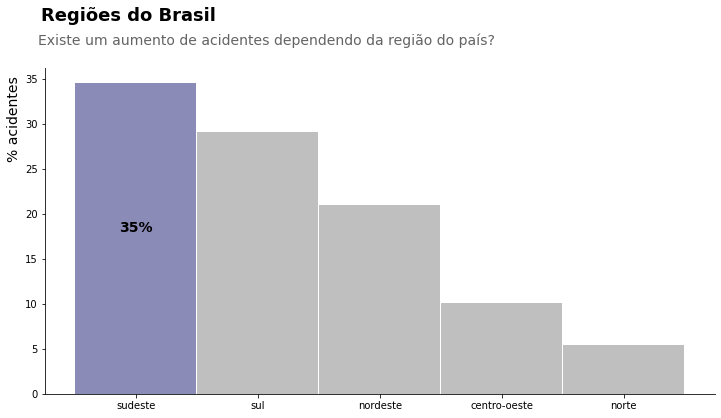

In [31]:
suptitle = 'Regiões do Brasil'
title = 'Existe um aumento de acidentes dependendo da região do país?'

colors=['#191970', '#808080', '#808080', '#808080', '#808080']

df['regiao_pais'] = df['uf'].apply(mapRegiaoPais)
percentual = round(df['regiao_pais'].value_counts(normalize=True)*100, 2)
percentual.plot.bar(width=0.99, alpha=0.5, figsize=(12, 6), rot=False, color=colors).spines[['top', 'right']].set_visible(False)
plt.suptitle(suptitle, fontsize=18, y=1.02, horizontalalignment='left', x=0.12, color='black', weight='bold')
plt.title(title, fontsize=14, color='#646464', y=1.05, loc='left', x=-0.01)
plt.ylabel('% acidentes', fontsize=14, horizontalalignment='left', y=0.71)
plt.text(0, 18, '35%', fontsize=14, weight='bold', horizontalalignment='center')
plt.grid(False)
plt.show()

> <p style='text-align: justify;'><font size=2.85>A quantidade de acidentes parece aumentar ou diminuir a depender da região do país. O Sudeste possui maior taxa de acidentes entre 2007 e 2021. Um dos motivos pode ser o fato de ser a região mais populosa e industrializada do Brasil. Segundo dados sobre frotas (disponível no site do governo federal) até outubro de 2021, a frota de automóveis dessa região representa 48% da frota nacional.</font></p>